<a href="https://colab.research.google.com/github/abishpius/Hobby_ML_Projects/blob/main/Microsoft_Stock_Price_Predict_w_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRBqgsFNUQB9bBGK8CSoR2f-2YJtQIVtfpX7Im8qYSCOpoeLVHyUf4449BISsVSGri6QIV3fxdX9wy_/pub?gid=0&single=true&output=csv"

In [ ]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1532 non-null   object 
 1   Open    1532 non-null   float64
 2   High    1532 non-null   float64
 3   Low     1532 non-null   float64
 4   Close   1532 non-null   float64
 5   Volume  1532 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.9+ KB


,Open,High,Low,Close,Volume
count,1532.000000,1532.000000,1532.000000,1532.000000,1.532000e+03
mean,109.404654,110.473342,108.308225,109.453048,3.013364e+07
std,58.855196,59.552484,58.163564,58.892800,1.420198e+07
min,40.340000,40.740000,39.720000,40.290000,5.677300e+04
25%,57.907500,58.190000,57.630000,57.957500,2.139867e+07
50%,94.995000,95.580000,93.675000,94.335000,2.654692e+07
75%,140.337500,141.545000,139.065000,140.362500,3.425882e+07
max,261.660000,263.190000,260.170000,261.970000,1.352271e+08


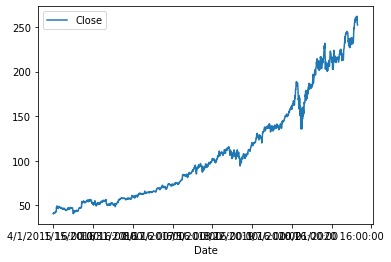

In [ ]:
df.plot(x = "Date", y = "Close")

In [ ]:
from  statsmodels.base.transform import BoxCox
bc = BoxCox()
df['Close'], lmbda = bc.transform_boxcox(df['Close'])

In [ ]:
data = df[['Date', "Close"]]
data.columns = ['ds', 'y']

In [ ]:
model_params = {
    "daily_seasonality": False,
    "weekly_seasonality": False,
    "yearly_seasonality": True,
    "seasonality_mode": "multiplicative",
    "growth": "logistic"
}

In [ ]:
from fbprophet import Prophet

model = Prophet(**model_params)
data['cap'] = data['y'].max() + data["y"].std()*0.05

model.fit(data)

future = model.make_future_dataframe(periods = 365)
future["cap"] = data['cap'].max()

forecast = model.predict(future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


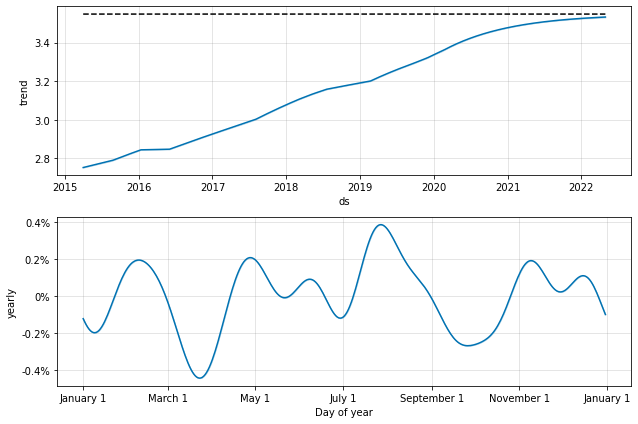

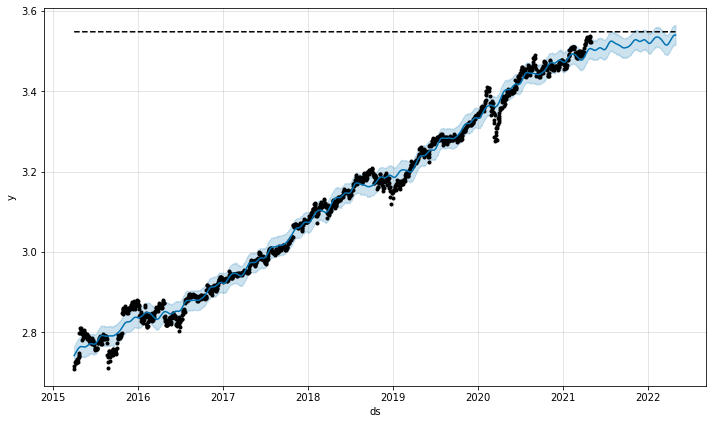

In [ ]:
model.plot_components(forecast);
model.plot(forecast);

In [ ]:
model = Prophet(**model_params)

model = model.add_seasonality(name = "monthly", period = 30, 
                    fourier_order = 10)
model = model.add_seasonality(name = "quarterly", period = 92.25, 
                    fourier_order = 10 )

model.add_country_holidays("US")
model.fit(data)

future = model.make_future_dataframe(periods=365)
future['cap'] = data['cap'].max()

forecast = model.predict(future)

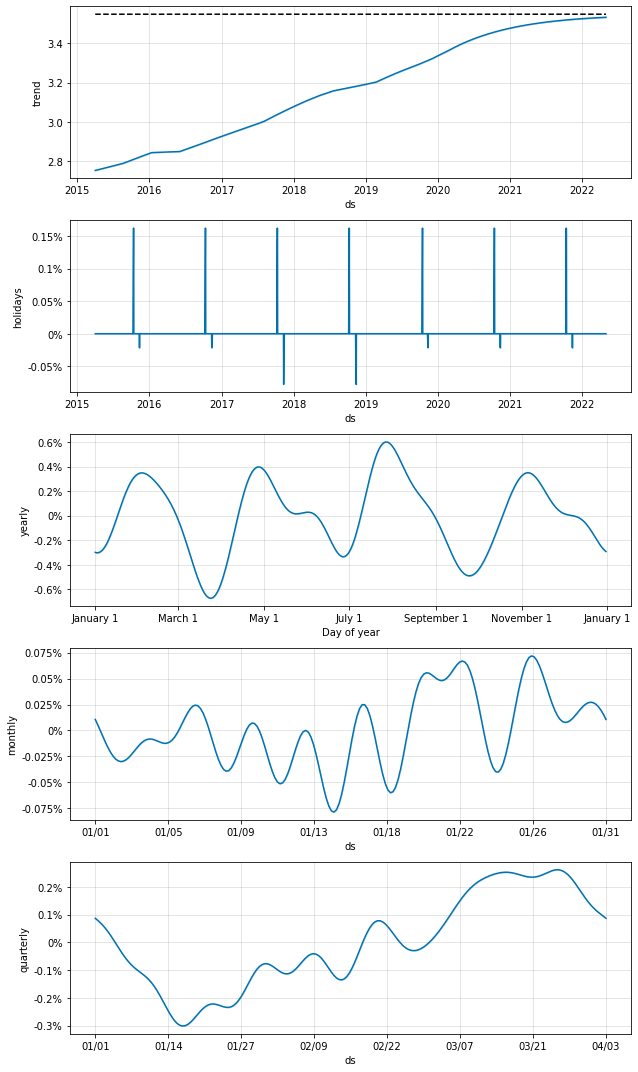

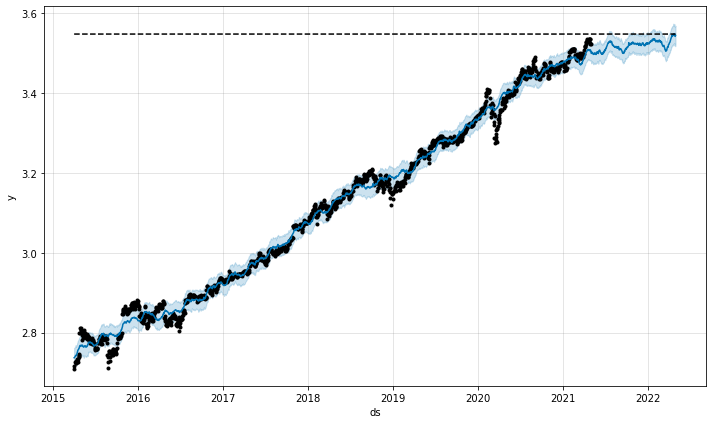

In [ ]:
model.plot_components(forecast);
model.plot(forecast);

In [ ]:
import itertools
import numpy as np
from fbprophet.diagnostics import cross_validation, performance_metrics

param_grid = {
    "daily_seasonality": [False],
    "weekly_seasonality": [False],
    "yearly_seasonality": [True],
    "growth": ['logistic'],
    "changepoint_prior_scale": [0.001, 0.01, 0.1, 0.5],
    "seasonality_prior_scale": [0.01, 0.1, 1.0, 10.0]
    }

# Generate combinations of parameters
all_params = [
    dict(zip(param_grid.keys(), v)) for v in 
    itertools.product(*param_grid.values())
]
all_params

[{'changepoint_prior_scale': 0.001,
  'daily_seasonality': False,
  'growth': 'logistic',
  'seasonality_prior_scale': 0.01,
  'weekly_seasonality': False,
  'yearly_seasonality': True},
 {'changepoint_prior_scale': 0.001,
  'daily_seasonality': False,
  'growth': 'logistic',
  'seasonality_prior_scale': 0.1,
  'weekly_seasonality': False,
  'yearly_seasonality': True},
 {'changepoint_prior_scale': 0.001,
  'daily_seasonality': False,
  'growth': 'logistic',
  'seasonality_prior_scale': 1.0,
  'weekly_seasonality': False,
  'yearly_seasonality': True},
 {'changepoint_prior_scale': 0.001,
  'daily_seasonality': False,
  'growth': 'logistic',
  'seasonality_prior_scale': 10.0,
  'weekly_seasonality': False,
  'yearly_seasonality': True},
 {'changepoint_prior_scale': 0.01,
  'daily_seasonality': False,
  'growth': 'logistic',
  'seasonality_prior_scale': 0.01,
  'weekly_seasonality': False,
  'yearly_seasonality': True},
 {'changepoint_prior_scale': 0.01,
  'daily_seasonality': False,
  '

In [ ]:
rmses = list()

for params in all_params:
  m = Prophet(**params)

  m = m.add_seasonality(name = 'monthly', period = 30, fourier_order = 5)
  m = m.add_seasonality(name = 'quarterly', period = 92.25, fourier_order = 10)

  m.add_country_holidays(country_name = "US")

  m.fit(data)

  df_cv = cross_validation(m, initial = "730 days", period = '365 days', 
      horizon = '365 days',      parallel = "processes")
  
  df_p = performance_metrics(df_cv, rolling_window = 1)

  rmses.append(df_p['rmse'].values[0])

# best params
best_params = all_params[np.argmin(rmses)]
print("The best parameters are:", best_params)

INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-05-01 16:00:00 and 2020-04-30 16:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f437e250a50>
INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-05-01 16:00:00 and 2020-04-30 16:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f437e3e37d0>
INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-05-01 16:00:00 and 2020-04-30 16:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f43889ff450>
INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-05-01 16:00:00 and 2020-04-30 16:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f437e2a5690>
INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-05-01 16:00:00 and 2020-04-30 16:00:00
INFO:fbprophet:Applying in parallel with <con

The best parameters are: {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


In [ ]:
best_model = Prophet(**best_params)

best_model = best_model.add_seasonality(name = 'monthly', period = 30, 
          fourier_order = 5)
best_model = best_model.add_seasonality(name = 'quarterly', period = 92.25,
            fourier_order = 10)

best_model.add_country_holidays(country_name = "US")

best_model.fit(data)

future = best_model.make_future_dataframe(periods=365, freq = "D")

future['cap'] = data['cap'].max()

future = best_model.predict(future)

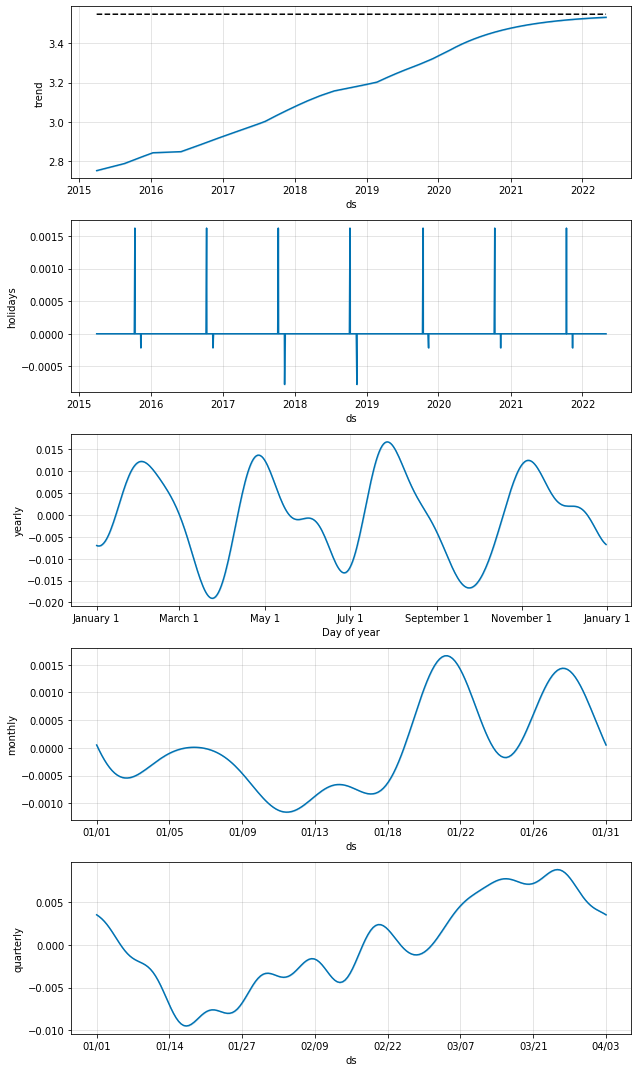

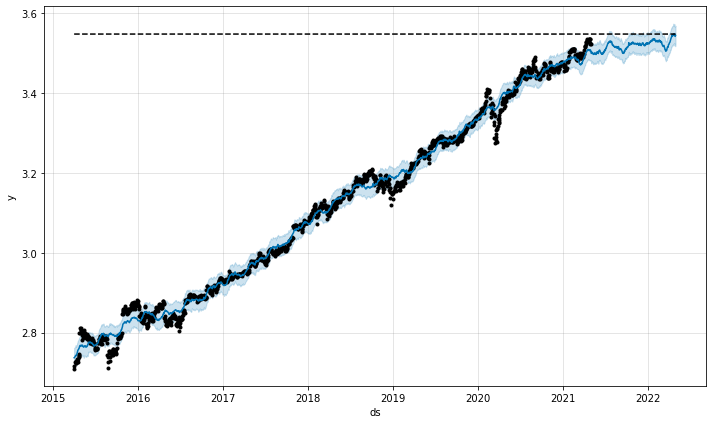

In [ ]:
best_model.plot_components(forecast);
best_model.plot(forecast);

In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 68 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ds                                 1897 non-null   datetime64[ns]
 1   trend                              1897 non-null   float64       
 2   cap                                1897 non-null   float64       
 3   yhat_lower                         1897 non-null   float64       
 4   yhat_upper                         1897 non-null   float64       
 5   trend_lower                        1897 non-null   float64       
 6   trend_upper                        1897 non-null   float64       
 7   Christmas Day                      1897 non-null   float64       
 8   Christmas Day_lower                1897 non-null   float64       
 9   Christmas Day_upper                1897 non-null   float64       
 10  Christmas Day (Observed)           1

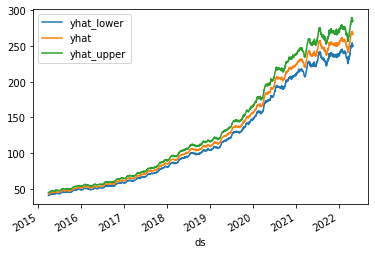

In [ ]:
forecast['yhat'] = bc.untransform_boxcox(x = forecast['yhat'],
        lmbda = lmbda)
forecast['yhat_lower'] = bc.untransform_boxcox(x = forecast['yhat_lower'], 
        lmbda = lmbda)
forecast['yhat_upper'] = bc.untransform_boxcox(x=forecast['yhat_upper'], 
        lmbda = lmbda)
forecast.plot(x = "ds", y = ['yhat_lower', 'yhat', 'yhat_upper'])

In [ ]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
  json.dump(model_to_json(best_model), fout)

with open('serialized_model.json', 'r') as fin:
  model = model_from_json(json.load(fin))

In [ ]:
def warm_start(prophet_model):
  res = {}
  for pname in ['k', 'm', 'sigma_obs']:
    res[pname] = prophet_model.params[pname][0][0]
  for pname in ['delta', 'beta']:
    res[pname] = prophet_model.params[pname][0]
  return res

In [ ]:
data1 = data.head(-1)
model1 = Prophet().fit(data1)

In [ ]:
%timeit Prophet().fit(data)
%timeit Prophet().fit(data, init = warm_start(model1))

1 loop, best of 5: 4.81 s per loop
1 loop, best of 5: 770 ms per loop
